# Lab1 - Camera Calibration

## Objective of the Labs1:

1. Understand the basic principles of **camera calibration**.
2. Use images of a grid or checkerboard to calibrate a camera.
3. Correct radial and **tangential distortion errors**.
4. Visualize the effect of calibration on images.


## Lab Statement

### 1 Introduction to Camera Calibration

Before diving into coding, please answer the following theoretical questions:

- What are the **intrinsic parameters** of a camera?
**-->** Intrinsic parameters are the internal characteristics of a camera that affect how it captures images. These parameters include:

    - Focal Length (f): Determines the distance from the lens to the image sensor and affects the scale of the captured image.
    - Principal Point (cx, cy): The point on the image sensor where the optical axis intersects. It is typically near the center of the image.
    - Skew Coefficient: Accounts for any non-orthogonality between the x and y axes of the image sensor, though it is often assumed to be zero in modern cameras.
    - Lens Distortion Coefficients: Parameters that describe how the lens distorts straight lines in the image, which can affect the geometric accuracy of the captured image.
- What are the **extrinsic parameters** of a camera?
**-->** Extrinsic parameters define the camera's position and orientation in the 3D world relative to a specific coordinate system. These parameters include:

    - Translation Vector (t): Describes the camera's position in the world coordinates. It indicates where the camera is located in 3D space.
    - Rotation Matrix (R): Represents the orientation of the camera relative to the world coordinates. It defines how the camera is rotated around the x, y, and z axes.

- What are the main distortions that affect a camera (radial, tangential)?
**-->** he main distortions that affect camera images are:

    - Radial Distortion: This occurs when light rays passing through the lens are bent differently based on their distance from the optical center. It can cause straight lines to appear curved in the captured image. Radial distortion is usually described by coefficients that model the degree of distortion, commonly expressed as barrel distortion (where lines bow outwards) or pincushion distortion (where lines bow inwards).

    - Tangential Distortion: This type of distortion occurs when the lens is not perfectly aligned with the image sensor. It can cause the image to be displaced in the tangential direction, resulting in a skewed perspective. Tangential distortion is less common than radial distortion but can still impact the accuracy of the captured image.


### 2. Loading and Preparing Images:

Download a set of images of a checkerboard or calibration grid taken from different angles with a fixed camera. You can also capture these images yourself if capturing equipment is available.
### 3. Detecting Checkerboard Corners:

Use the **OpenCV** library to detect the corners in the calibration images.

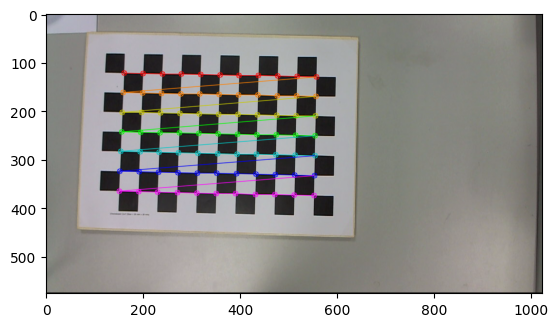

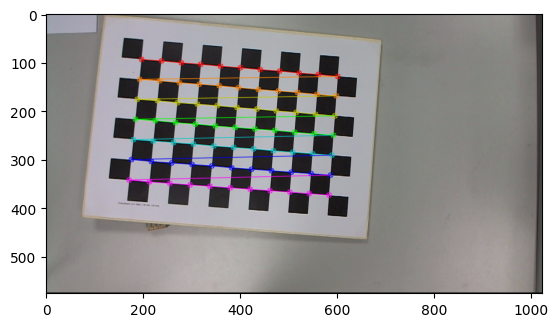

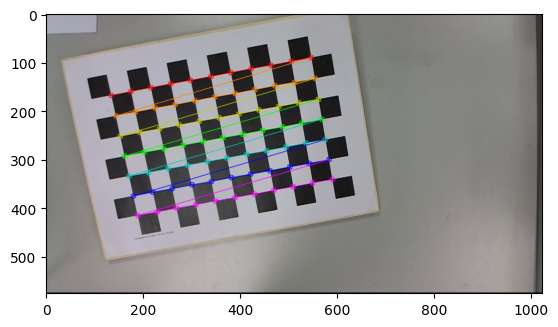

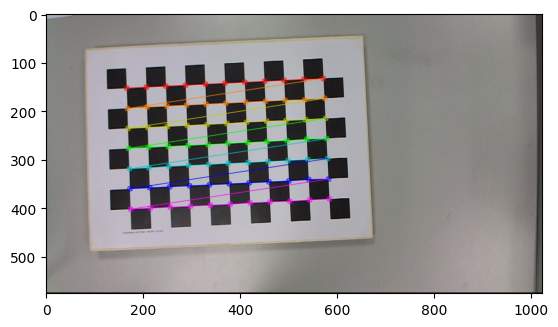

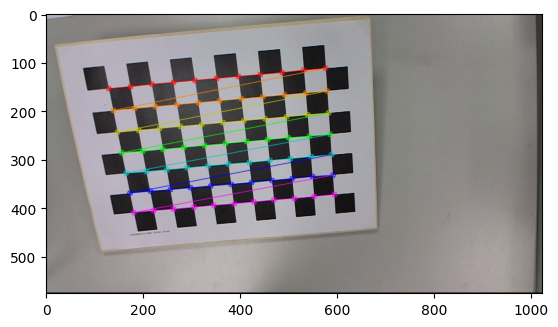

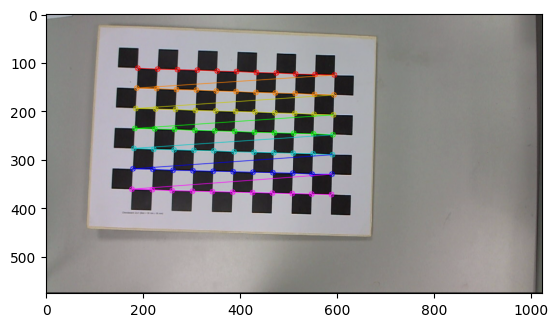

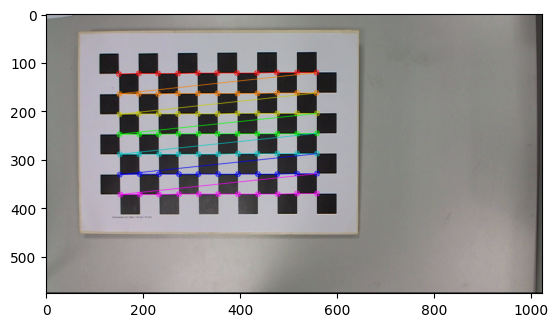

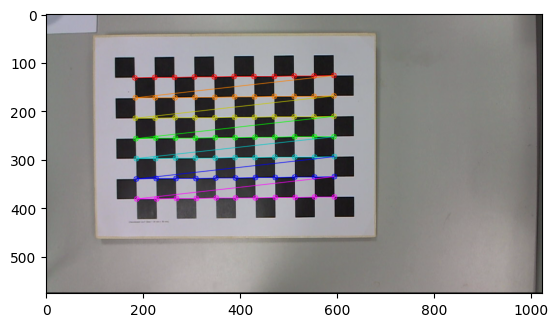

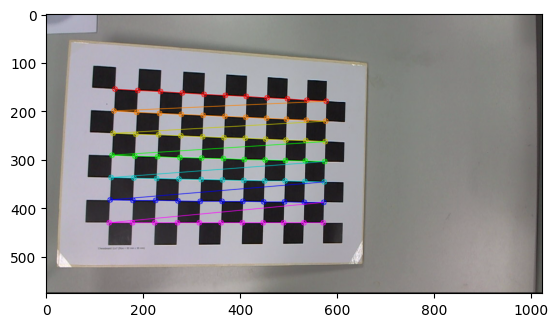

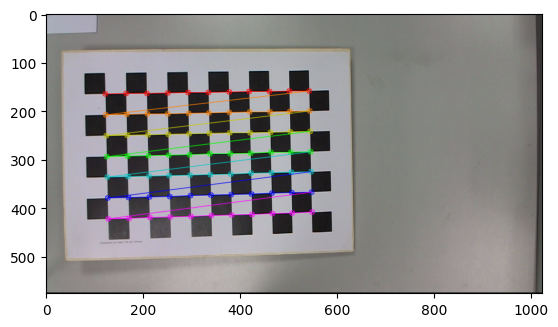

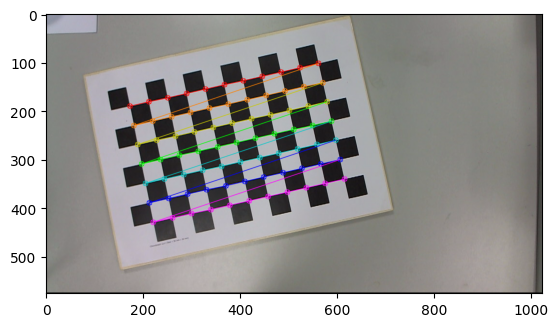

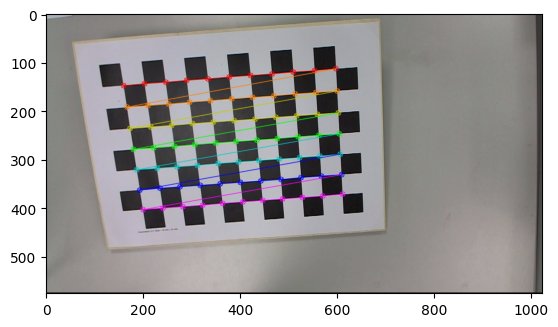

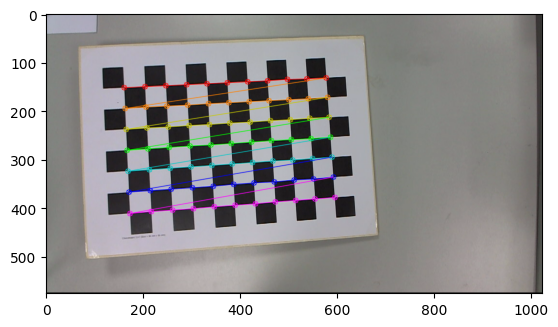

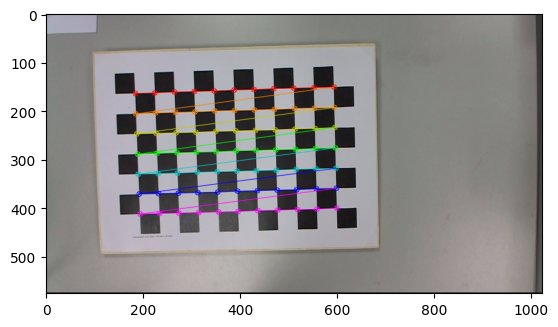

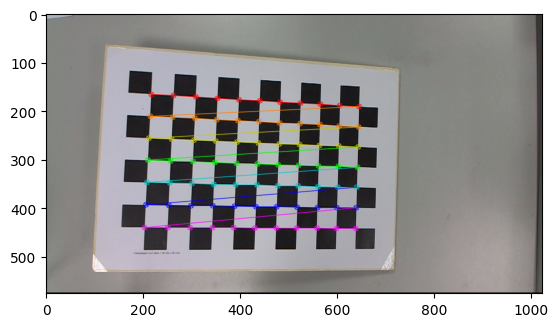

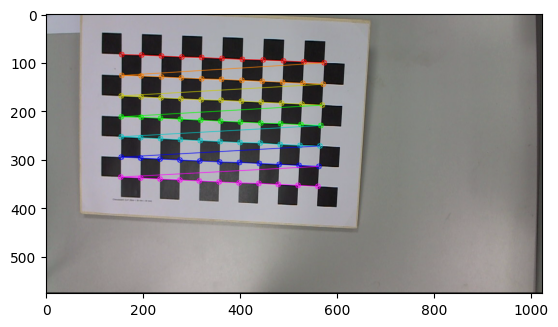

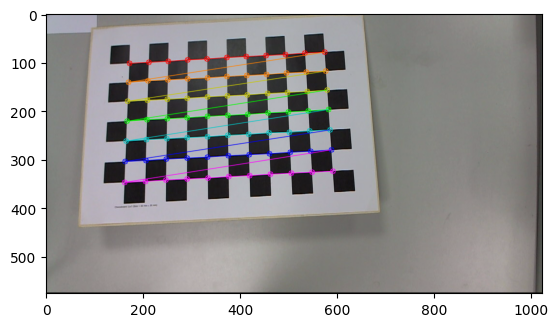

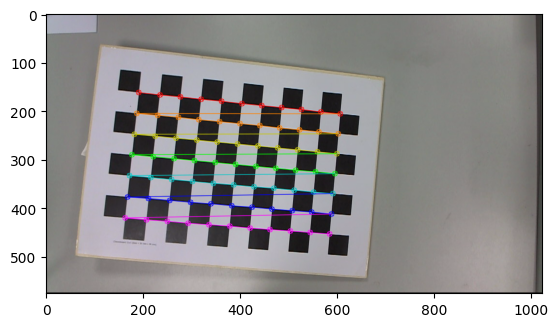

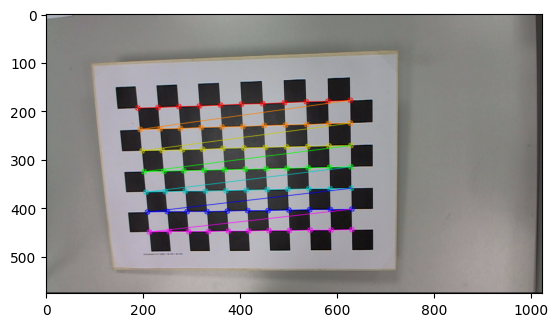

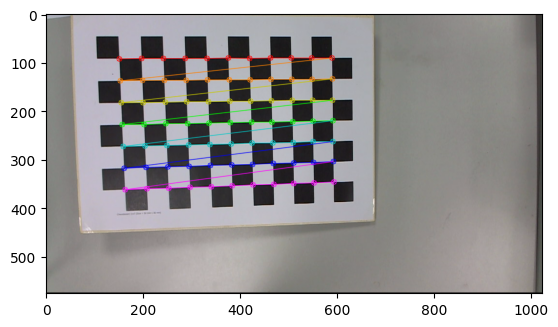

In [3]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

SQUARE_SIZE = 30  # how big are the squares of the checkerboard pattern (in millimeters)
BOARD_SIZE = (11,7)  # size of the chessboard (measured from the crossing corners of the squares)

# Prepare object points (3D) based on the checkerboard dimensions
objp = []
for i in range(BOARD_SIZE[1]):
    for j in range(BOARD_SIZE[0]):
        objp.append([j * SQUARE_SIZE, i * SQUARE_SIZE, 0])
objp = np.array(objp, dtype=np.float32)

# Arrays to store object points and image points from all the images.
objpoints = []  # 3d points in real-world space
imgpoints = []  # 2d points in image plane

images = glob.glob("./leftcamera/*.png")

for image_file in images:
    # Load image and convert to grayscale
    image = cv2.imread(image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find the checkerboard corners
    ret, corners = cv2.findChessboardCorners(gray, BOARD_SIZE, None)

    # If found, add object points, image points (after refining them)
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        corners_refined = cv2.cornerSubPix(
            gray,
            corners,
            (11, 11),
            (-1, -1),
            criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001),
        )

        cv2.drawChessboardCorners(image, BOARD_SIZE, corners_refined, ret)

        # Display the image with detected corners
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()


### 4. Camera Calibration:

Use the detected points to calibrate the camera. This step will provide you with the **intrinsic parameters**(camera matrix) and the **distortion coefficients**

In [4]:
ret, camera_matrix, distortion_coeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print("Calibration results: ", ret)
print("\nCamera matrix:\n", camera_matrix)
print("\nDistortion coefficients:\n", distortion_coeffs)
print("\nRotation vectors:\n", rvecs)
print("\nTranslation vectors:\n", tvecs)

Calibration results:  0.18599386512896035

Camera matrix:
 [[718.91823804   0.         523.81819576]
 [  0.         729.96806911 285.67619182]
 [  0.           0.           1.        ]]

Distortion coefficients:
 [[ 3.10648843e-02 -1.79709599e-01  8.74315005e-04  1.77034384e-04
   2.13728787e-01]]

Rotation vectors:
 (array([[-0.03818686],
       [ 0.00774292],
       [ 0.02128721]]), array([[-0.04782376],
       [-0.03512194],
       [ 0.07783762]]), array([[ 0.08804169],
       [-0.00245076],
       [-0.18027632]]), array([[-0.03096739],
       [-0.00578979],
       [-0.04943515]]), array([[ 0.23140206],
       [-0.00462254],
       [-0.08836351]]), array([[-0.03834106],
       [-0.03063262],
       [ 0.02915894]]), array([[ 0.02005095],
       [ 0.0054988 ],
       [-0.0034406 ]]), array([[ 0.01921866],
       [-0.00272343],
       [-0.00945497]]), array([[-0.03328733],
       [-0.16174864],
       [ 0.03000797]]), array([[ 0.00240823],
       [-0.05535419],
       [-0.02291339]]), 

### 5. Distortion Correction:

Once the calibration is complete, use the obtained parameters to correct the images and remove the distortions

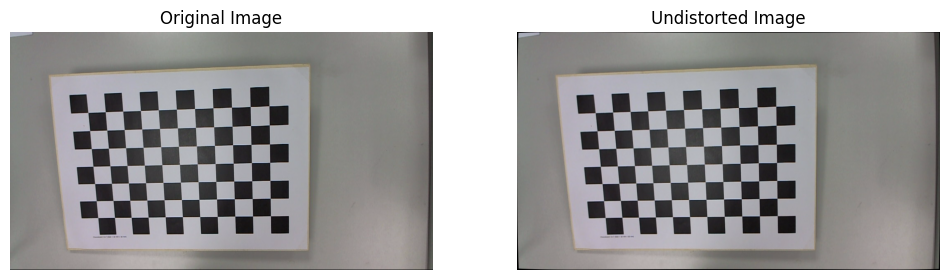

In [5]:
# Undistort and display an example image
example_image = cv2.imread(images[18])
h, w = example_image.shape[:2]
new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, distortion_coeffs, (w, h), 1, (w, h))

# Undistort the image
undistorted_image = cv2.undistort(example_image, camera_matrix, distortion_coeffs, None, new_camera_matrix)

# Display original and undistorted images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB))
axs[1].set_title("Undistorted Image")
axs[1].axis('off')
plt.show()

# x, y, w, h = roi
# undistorted_image = undistorted_image[y:y+h, x:x+w]
# cv2.imwrite('calibrated_result.jpg', undistorted_image)

### 6. Results Analysis:

   - Compare the images before and after distortion correction.
   - Measure the differences observed visually and discuss any remaining errors.

### 7. Calibration Evaluation:

Use the following function to evaluate the reprojection error, which measures the accuracy of your calibration.

In [6]:
# Calculate re-projection error
total_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], camera_matrix, distortion_coeffs)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
    total_error += error

mean_error = total_error / len(objpoints)
print("Mean re-projection error: {:.4f}".format(mean_error))

Mean re-projection error: 0.0210
